# Advanced Regression Assignment : Surprise Housing

## Importing the data

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
# Loading the dataset
raw_dataset = pd.read_csv("train.csv", index_col=0)
print("Dataset shape: ", raw_dataset.shape)
raw_dataset.head()

Dataset shape:  (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Looking at the data, there are 1460 data points and 80 columns.

In [3]:
for col in raw_dataset.columns:
  print(raw_dataset[col].value_counts(), end="\n\n")

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside    

In [4]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

There are many missing values in the dataset

## Data Cleaning

### Check for duplicates

In [5]:
raw_dataset.duplicated().sum()

0

The dataset does not have any duplicate entries

### Handling missing values

In [6]:
raw_dataset.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [7]:
# Getting percentage of missing values
missing_percentage = round(100 * raw_dataset.isna().sum() / raw_dataset.shape[0], 2).sort_values(ascending=False)
missing_percentage

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
Heating         0.00
HeatingQC       0.00
MSZoning        0.00
1stFlrSF        0.00
SalePrice       0.00
Length: 80, dtype: float64

In [8]:
# Dropping all columns where the missing values is grater than 30%
cols_to_drop = missing_percentage[missing_percentage >= 30].index
raw_dataset.drop(cols_to_drop, axis=1, inplace=True)

In [9]:
missing_percentage = round(100 * raw_dataset.isna().sum() / raw_dataset.shape[0], 2).sort_values(ascending=False)
missing_percentage

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
                ...  
BsmtUnfSF        0.00
TotalBsmtSF      0.00
MSZoning         0.00
HeatingQC        0.00
SalePrice        0.00
Length: 75, dtype: float64

After removing the columns, now there are 75 columns. There are still some columns with missing values.

### Imputing missing data

In [10]:
missing_percentage_cols = list(missing_percentage[missing_percentage > 0].index)
raw_dataset[missing_percentage_cols].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [11]:

# imputing missing values in numeric cols with the median value
numeric_cols_to_impute = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for col in numeric_cols_to_impute:
  raw_dataset[col].fillna(raw_dataset[col].median(), inplace=True)
  missing_percentage_cols.remove(col)

In [12]:
# Remaining categorical cols to impute
for col in missing_percentage_cols:
  print(f"{col} \t: {raw_dataset[col].isna().sum()}")

GarageType 	: 81
GarageFinish 	: 81
GarageQual 	: 81
GarageCond 	: 81
BsmtFinType2 	: 38
BsmtExposure 	: 38
BsmtQual 	: 37
BsmtCond 	: 37
BsmtFinType1 	: 37
MasVnrType 	: 8
Electrical 	: 1


In [13]:
# 'Electrical' has only 1 missing value. Imputing it with mode
missing_percentage_cols.remove('Electrical')

raw_dataset['Electrical'].fillna(raw_dataset['Electrical'].mode(), inplace=True)

In [14]:
# Replacing other missing values in categorical columns to the string : "None"

for col in missing_percentage_cols:
  raw_dataset[col].fillna("None", inplace=True)


All the missing values have been handled

## Exploratory Data Analysis

In [15]:
categorical_cols = []
numeric_cols = []

for col in raw_dataset.columns:
  if str(raw_dataset.dtypes[col]) == 'object':
    categorical_cols.append(col)
  else:
    numeric_cols.append(col)

print(f"Categorical Cols : {len(categorical_cols)} : {categorical_cols}")
print(f"Numeric Cols : {len(numeric_cols)} : {numeric_cols}")

Categorical Cols : 38 : ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numeric Cols : 37 : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

### Extracting new features

In [16]:
# Getting age of house
raw_dataset['house_age'] = raw_dataset['YrSold'] - raw_dataset['YearBuilt']

# dropping as not needed anymore
raw_dataset.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
numeric_cols.remove('YrSold')
numeric_cols.remove('YearBuilt')
numeric_cols.append('house_age')

### Analysing numeric columns

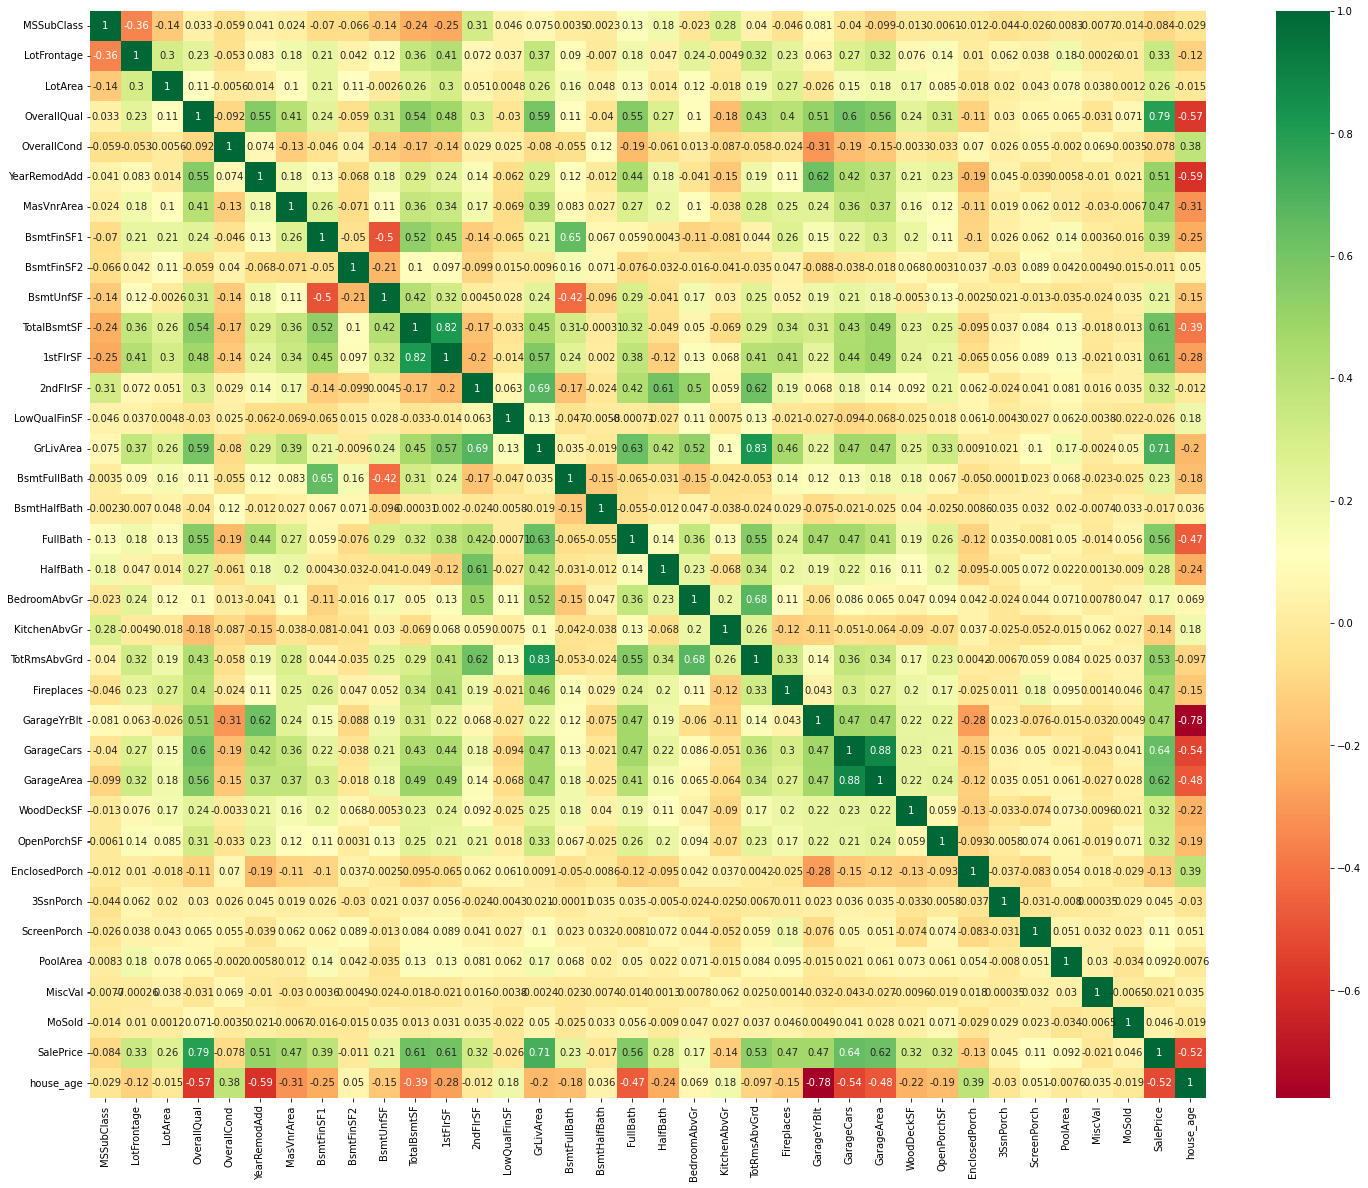

In [17]:
# hetamap of numeric columns
corr = raw_dataset[numeric_cols].corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

#### Features with strong correlation:
- ```GarageCars``` and ```GarageArea``` (0.88)
- ```TotalBsmtSF``` and ```1stFlrSF``` (0.82)
- ```TotRmsAbvGrd``` and ```GrLivArea``` (0.83)
- ```house_age``` and ```GarageYrBlt``` (0.78)
- ```SalePrice``` and ```GrLivArea``` (0.71)

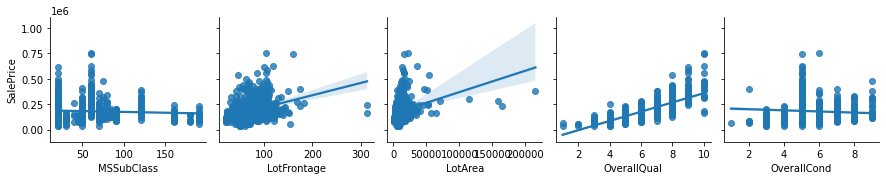

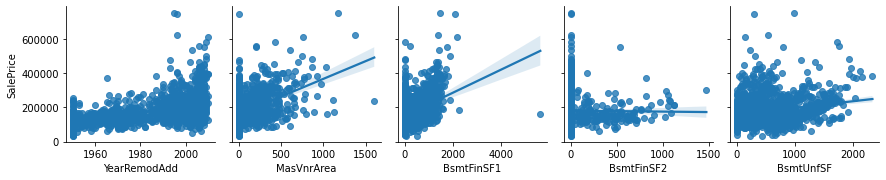

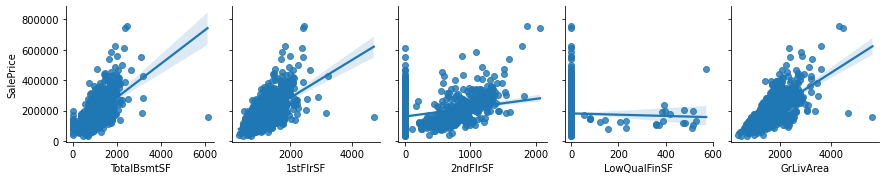

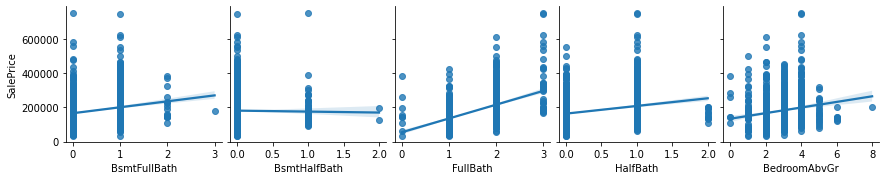

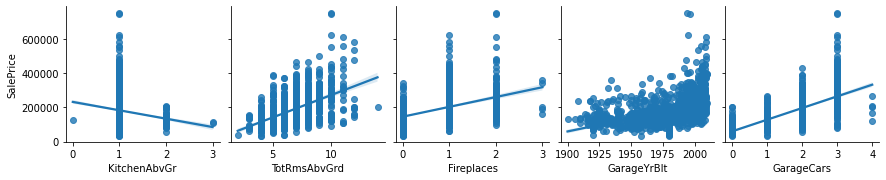

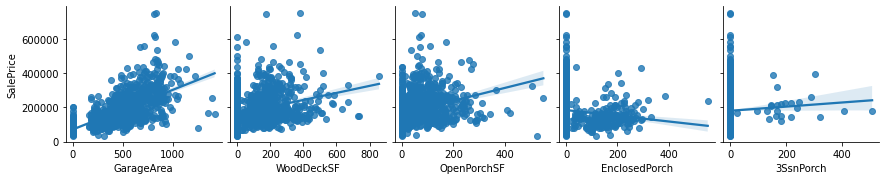

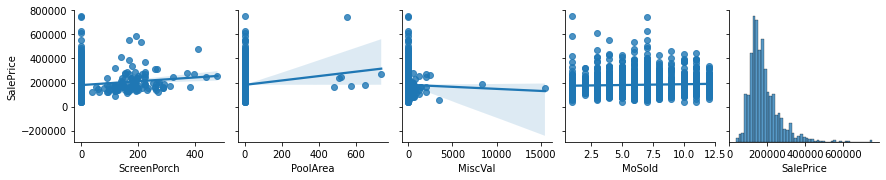

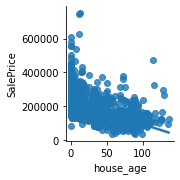

In [18]:
# Pair plot of numeric columns with SalePrice
for i in range(0, len(numeric_cols), 5):
  sns.pairplot(data=raw_dataset, x_vars=numeric_cols[i: i+5], y_vars="SalePrice", kind="reg")
plt.show()

The following columns have a positive correlation with ```SalePrice```:
- ```TotalBstmSF```
- ```1stFlrSf```
- ```GrLivArea```
- ```GarageArea```

The following columns have a negative correlation with ```SalePrice```:
- ```house_age```

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


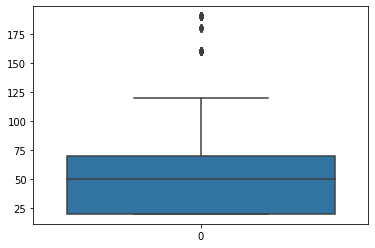




count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


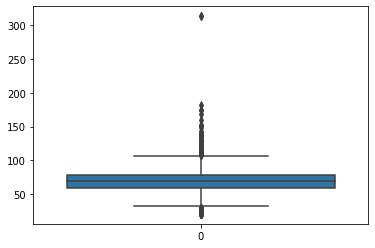




count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


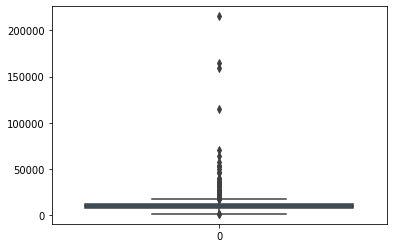




count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


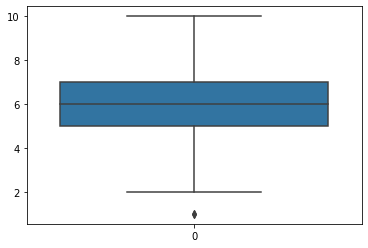




count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


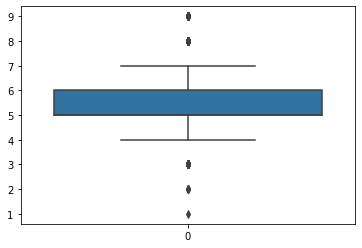




count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


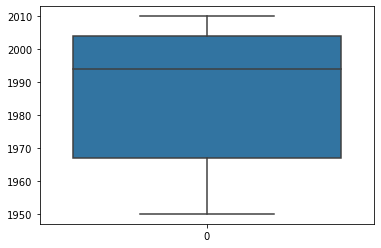




count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


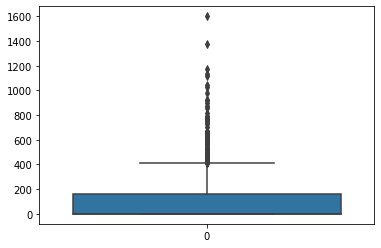




count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


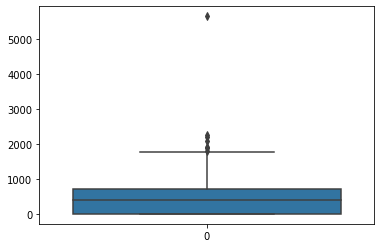




count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


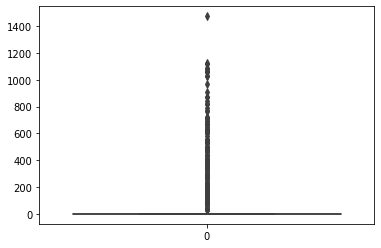




count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


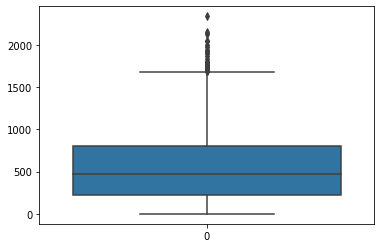




count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


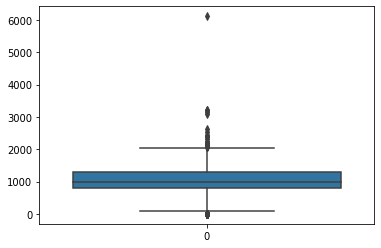




count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


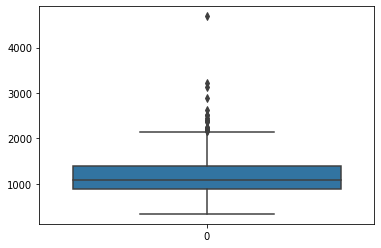




count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


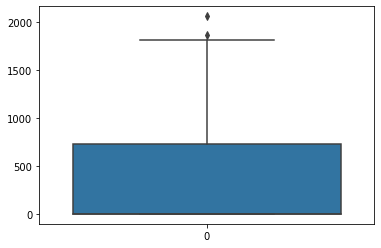




count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


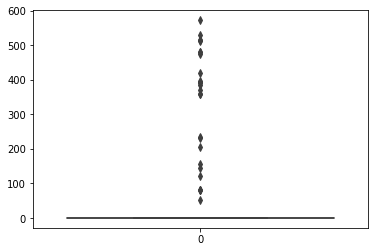




count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


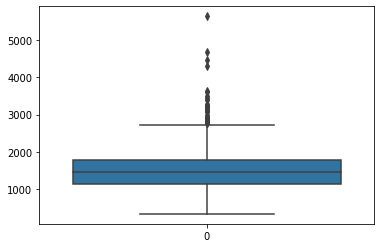




count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


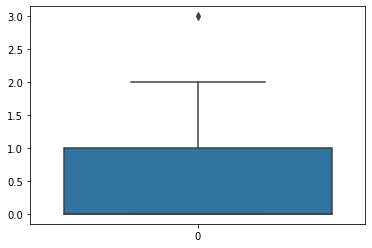




count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


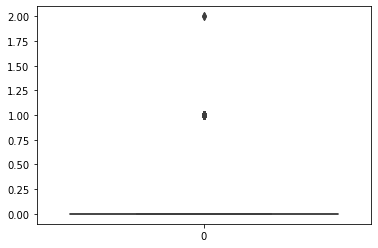




count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


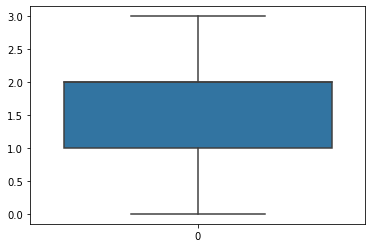




count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


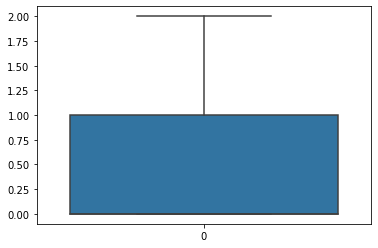




count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


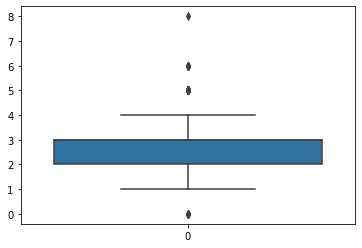




count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


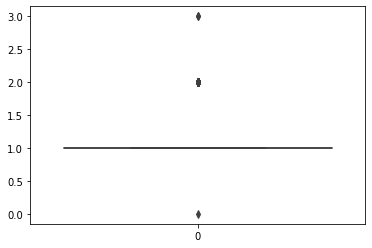




count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


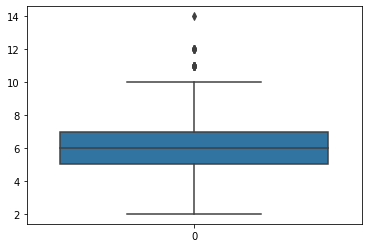




count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


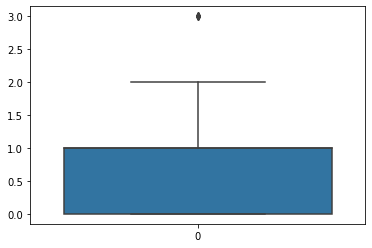




count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


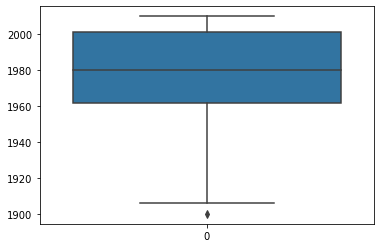




count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


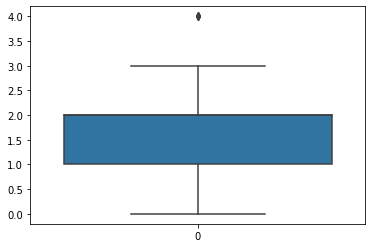




count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


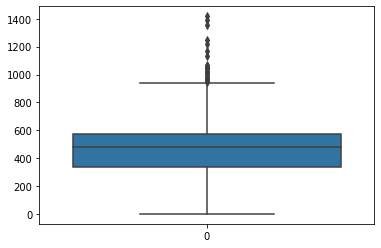




count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


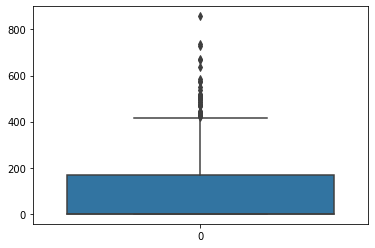




count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


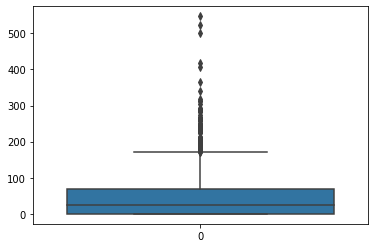




count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


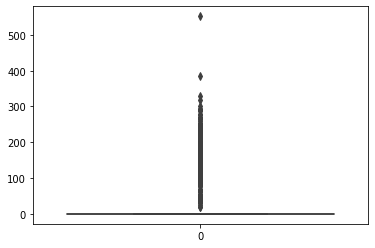




count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


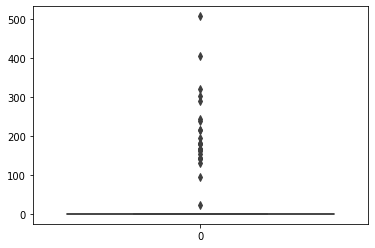




count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


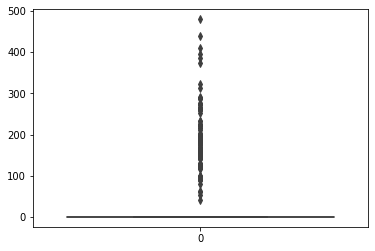




count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


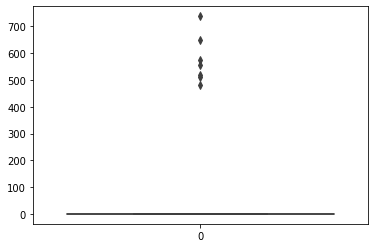




count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


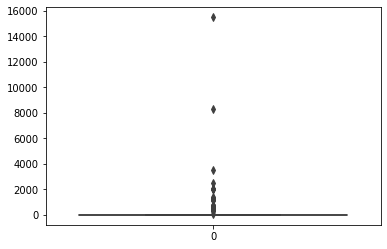




count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


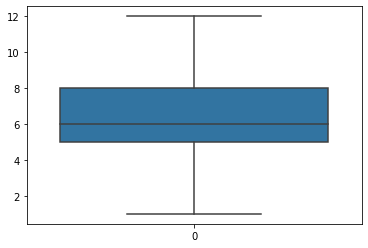




count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


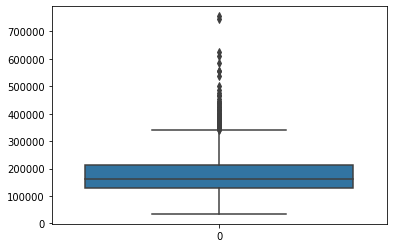




count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: house_age, dtype: float64


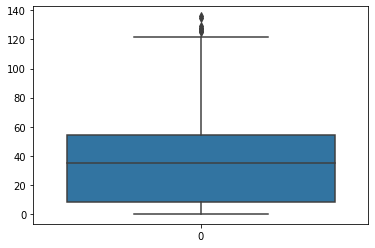

In [19]:
# Box plot of the numeric columns
for i in range(len(numeric_cols)):
  box_col = numeric_cols[i]
  print(raw_dataset[box_col].describe())
  sns.boxplot(raw_dataset[box_col].to_numpy())
  plt.show()
  print("\n\n")

Most of the the house price is in the range of 163000 (Median).

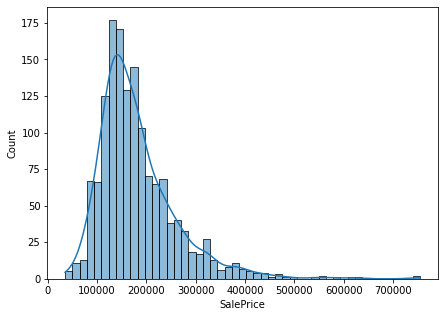

In [20]:
plt.figure(figsize=(7, 5))
sns.histplot(raw_dataset['SalePrice'], kde=True)
plt.show()

The range of the target variable SalePrice is very large. Transforming the column using Log transformation.

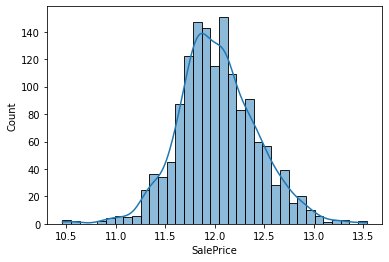

In [21]:
raw_dataset['SalePrice'] = np.log(raw_dataset['SalePrice'])
sns.histplot(raw_dataset['SalePrice'], kde=True)
plt.show()

There are many outliers in the ```SalePrice``` column. Let us remove them

In [22]:
# Considering all values above 0.95 quantile and less than 0.05 as outliers
quant_95 = raw_dataset['SalePrice'].quantile(0.95)
quant_5 = raw_dataset['SalePrice'].quantile(0.05)

raw_dataset = raw_dataset[(raw_dataset['SalePrice'] <= quant_95) & (raw_dataset['SalePrice'] >= quant_5)]
raw_dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,house_age
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,12.247694,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,12.109011,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,12.317167,7
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,11.849398,91
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,12.429216,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,WD,Normal,12.072541,8
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,WD,Normal,12.254863,32
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,WD,Normal,12.493130,69


After removing the outliers, Finally we have 1316 datapoints

### Analysing Categorical Columns

In [23]:
sns.set_style('darkgrid')
def countplot(dataframe, figsize):
  max_shape = dataframe.shape[1] // 2
  fig = plt.figure(figsize=figsize)
  for i in range(len(dataframe.columns)):
    col = dataframe.iloc[:, i]
    plt.subplot(max_shape, 2, i+1)
    plot = sns.countplot(data=dataframe, y=col)
  plt.show()

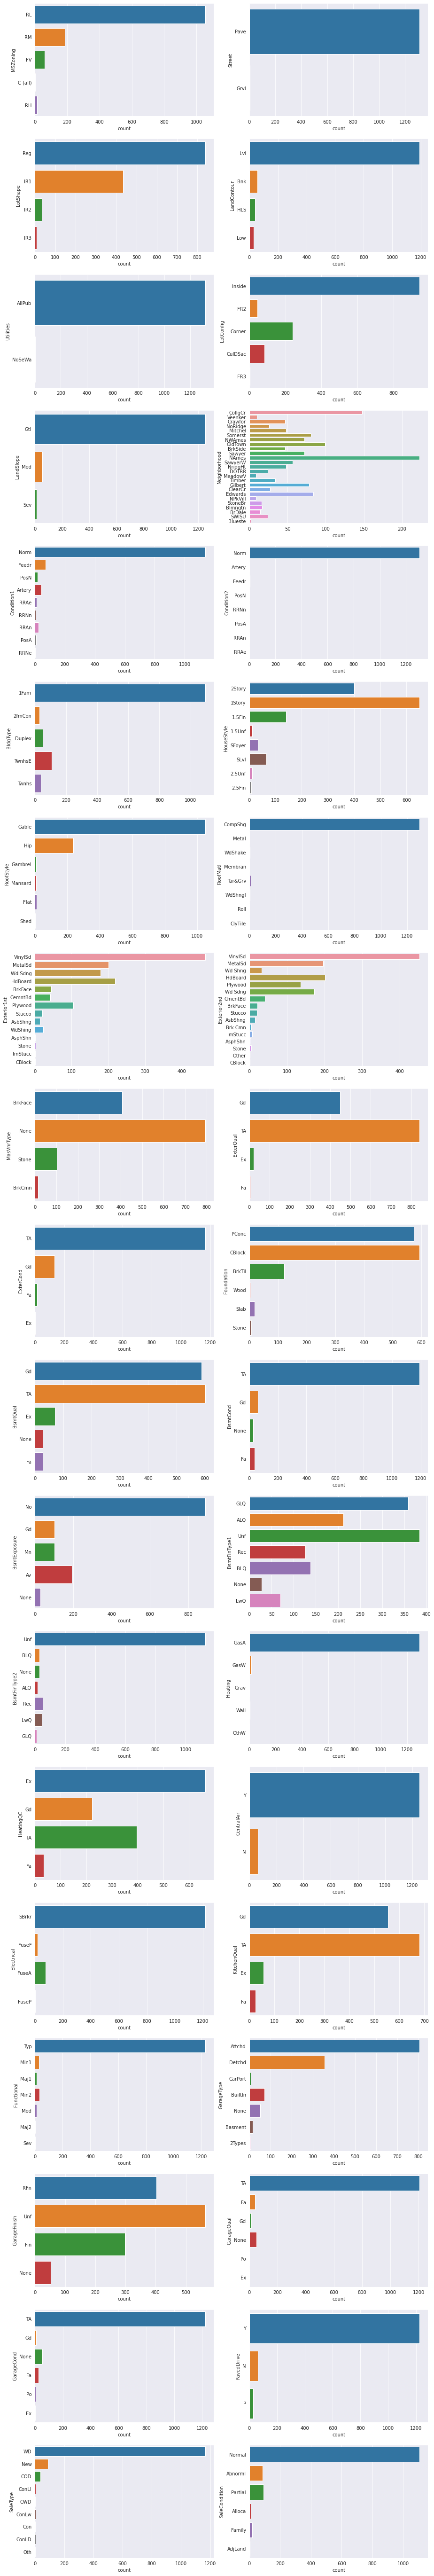

In [24]:
countplot(raw_dataset[categorical_cols], (15, 100))

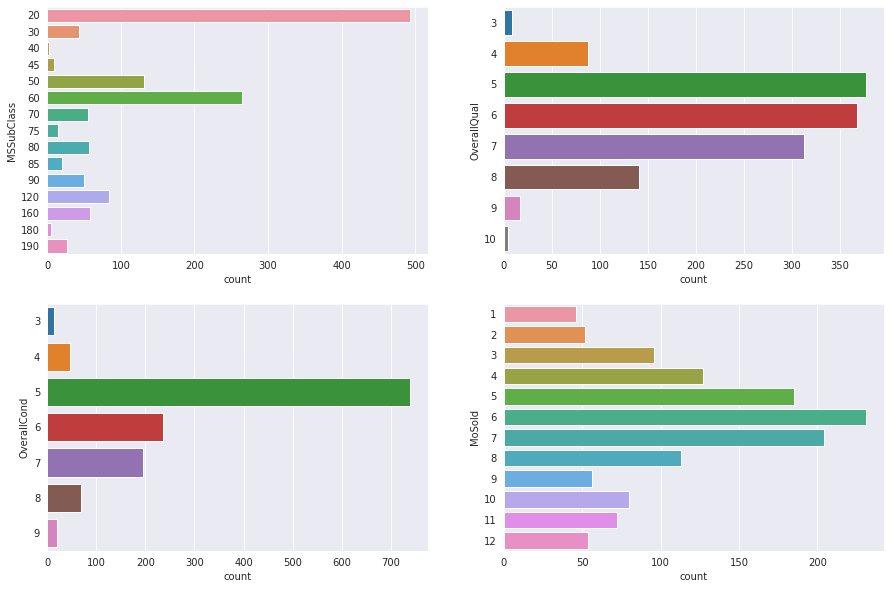

In [25]:
countplot(raw_dataset[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']], (15, 10))

- Most of the houses are in RL : Residential Low Density area.
- Most of the houses have paved road access with paved driveway.
- Most houses are of regular shape followed by slightly irregular shaped houses, have a near flat / level ground and a gentle slope.
- Most houses have All public Utilities (Electricity ,Gas , Water and Septic tank)	available.
- Most houses are inside lot followed by corner lot houses.
- North Ames houses were sold mostly followed by houses in College creek.
- Most houses have normal proximity (Condition1, Condition2).
- Most houses are Single-family Detached houses (1Fam) and one story houses.
- Most houses have a Gable roof style and Standard (Composite) Shingle roof material.
- Vinyl Siding exterior covering was commonly used.
- Most houses did not have a Masonry veneer.
- The quality and present condition of the material on the exterior for most houses are Average / Typical.
- Most houses have a Poured Contrete foundation or a Cinder Block foundation.
- Most houses have a Typical (80-89 inches) basement height or a Good (90-99 inches) basement height.
- Most basements are Typical - slight dampness allowed.
- Most basements are unfurnished or Good living quarters.
- Most houses have Gas forced warm air furnace heating with Excellent heating quality.
- Most houses had central air conditioning.
- Standard Circuit Breakers & Romex electrical system was present in most houses.
- The quality of kitchen in most houses were Typical/Average.
- Most houses have average garage quality / condition attached to home and are unfinished.
- Most of the sales are normal sales and are of type Warranty Deed - Conventional.
- Most houses were of 1-STORY 1946 & NEWER ALL STYLES type.
- Most of the houses that are sold have an Average overall condition of the house and Average rating for the overall material and finish of the house.
- Most houses were sold in the month of June or July.


## Model Building

### One hot encoding of categorical variables (creating dummy variables)

In [26]:
for col in categorical_cols:
    # Creating dummy variables
    dummies = pd.get_dummies(raw_dataset[col], prefix=col, drop_first=True)
    raw_dataset = pd.concat([raw_dataset, dummies], axis=1)

    # dropping the original variable as it is not needed now
    raw_dataset.drop(col, inplace=True, axis=1)
raw_dataset.shape

(1316, 235)

In [27]:
# Converting column names to string type

raw_dataset.columns = raw_dataset.columns.astype(str)

### Split dataset into Train and Test splits

In [28]:
train_df, test_df = train_test_split(raw_dataset, test_size=0.3, random_state=102)

print("Train set shape: ", train_df.shape)
print("Test set shape: ", test_df.shape)

Train set shape:  (921, 235)
Test set shape:  (395, 235)


We take 70% of the data for training the model and the remaining 30% of the data for testing.

### Scaling the training features

In [29]:
scaler = MinMaxScaler()
columns = list(train_df.columns)
train_df[columns] = scaler.fit_transform(train_df[columns])
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,house_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1345,0.235294,0.219178,0.062

In [30]:
# Separating out the training features and the target variable

y_train = train_df['SalePrice']
X_train = train_df.drop('SalePrice', axis=1)

X_train.shape, y_train.shape

((921, 234), (921,))

### RFE
using RFE (Recursive Feature Elimination) to reduce the number of features from 234 to 50

In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

rfe = RFE(linear_model, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

for col, support, rank in zip(X_train.columns, rfe.support_, rfe.ranking_):
  print(f"Columns: {col}, Selected: {support}, Rank: {rank}")

selected_cols = list(X_train.columns[rfe.support_])
print("\n The Following columns are selected by RFE:\n", selected_cols)

Columns: MSSubClass, Selected: False, Rank: 77
Columns: LotFrontage, Selected: True, Rank: 1
Columns: LotArea, Selected: True, Rank: 1
Columns: OverallQual, Selected: True, Rank: 1
Columns: OverallCond, Selected: True, Rank: 1
Columns: YearRemodAdd, Selected: False, Rank: 35
Columns: MasVnrArea, Selected: False, Rank: 156
Columns: BsmtFinSF1, Selected: True, Rank: 1
Columns: BsmtFinSF2, Selected: True, Rank: 1
Columns: BsmtUnfSF, Selected: True, Rank: 1
Columns: TotalBsmtSF, Selected: True, Rank: 1
Columns: 1stFlrSF, Selected: True, Rank: 1
Columns: 2ndFlrSF, Selected: True, Rank: 1
Columns: LowQualFinSF, Selected: False, Rank: 12
Columns: GrLivArea, Selected: True, Rank: 1
Columns: BsmtFullBath, Selected: False, Rank: 39
Columns: BsmtHalfBath, Selected: False, Rank: 169
Columns: FullBath, Selected: False, Rank: 40
Columns: HalfBath, Selected: False, Rank: 105
Columns: BedroomAbvGr, Selected: False, Rank: 117
Columns: KitchenAbvGr, Selected: True, Rank: 1
Columns: TotRmsAbvGrd, Selecte

### Linear Regression without regularization

In [32]:
def print_metrics(y_true, y_pred):
  rss =  np.sum(np.square(y_true - y_pred))
  r2 = r2_score(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mse ** 0.5

  return pd.DataFrame({"RSS": [rss], "R2 Score": [r2], "MSE": [mse], "RMSE": [rmse]}, index=["metrics"])

In [33]:
def residual_analysis(y_true, y_pred):
  residuals = y_true - y_pred
  
  plt.figure(figsize=(7, 5))
  plt.title("Distribution of error terms")
  sns.histplot(residuals, kde=True)
  
  plt.show()
  print("\n\n")

  plt.figure(figsize=(7, 4))
  plt.title("Residuals vs Predictions")
  plt.scatter(y_pred, residuals)
  plt.axhline(y=0, color='r', linestyle=':')

  plt.show()

In [34]:
# Scaling test set with the same scaler

columns = list(test_df.columns)
test_df[columns] = scaler.transform(test_df[columns])
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,house_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
248,0.000000,0.184932,0.0634

In [35]:
# Separating out the test features and the target variable

y_test = test_df['SalePrice']
X_test = test_df.drop('SalePrice', axis=1)

X_test.shape, y_test.shape

((395, 234), (395,))

In [36]:
# Getting only the columns selected by RFE
X_train_rfe = X_train[selected_cols]
X_test_rfe = X_test[selected_cols]

In [37]:
# Building a normal Linear Regression model with the selected columns
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

In [38]:
print("Train Metrics: ")
print_metrics(y_train, y_pred_train)

Train Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,4.729634,0.898549,0.005135,0.071661


In [39]:
print("\n\nTest Metrics: ")
print_metrics(y_test, y_pred_test)



Test Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,8.854723,0.61944,0.022417,0.149723


On normal linear regression model without any regularization, we get a R<sup>2</sup> score of 0.88 on the train set and 0.61 on the test set. It is clear that the model is overfitting the train set.

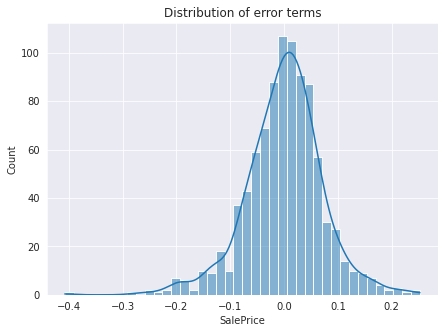

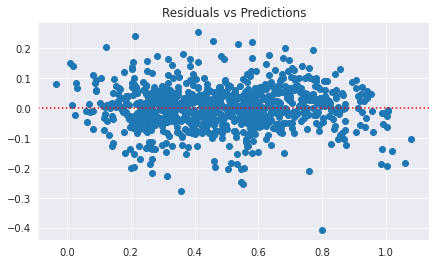

In [40]:
residual_analysis(y_train, y_pred_train)

- The error terms are normally distributed.
- The Residuals vs Predictions plot does not show any trend in the data.

### Ridge Regression with GridSearch on α (regularization parameter)

In [41]:
alpha_param_choices = {'alpha': [0.0002, 0.001, 0.002, 0.01, 0.02, 0.1, 0.2, 1, 2, 10, 20, 50, 100, 500, 1000]}

In [42]:
# Applying cross-validation on hyper-parameter alpha

ridge_model = Ridge()
cv_folds = 10
gridsearch_ridge = GridSearchCV(estimator=ridge_model, param_grid=alpha_param_choices, scoring='neg_mean_absolute_error', cv=cv_folds, n_jobs=-1)
gridsearch_ridge.fit(X_train_rfe, y_train)
print(f"Best params for ridge: {gridsearch_ridge.best_params_}")

Best params for ridge: {'alpha': 0.1}


In [43]:
# Building a Ridge Regression model with the alpha of 0.1
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_rfe, y_train)
y_pred_train_ridge = ridge.predict(X_train_rfe)
y_pred_test_ridge = ridge.predict(X_test_rfe)

In [44]:
print("Ridge Train Metrics: ")
print_metrics(y_train, y_pred_train_ridge)

Ridge Train Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,5.539625,0.881175,0.006015,0.077555


In [45]:
print("Ridge Test Metrics: ")
print_metrics(y_test, y_pred_test_ridge)

Ridge Test Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,4.614343,0.801684,0.011682,0.108083


From the previous linear regression model, this model has improved on the test set with a R<sup>2</sup> value of 0.80

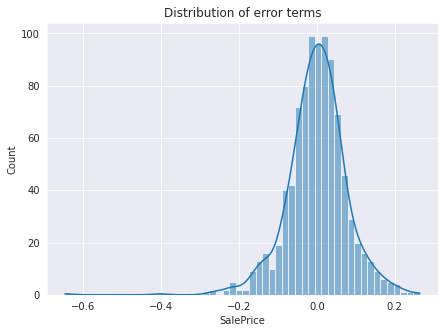

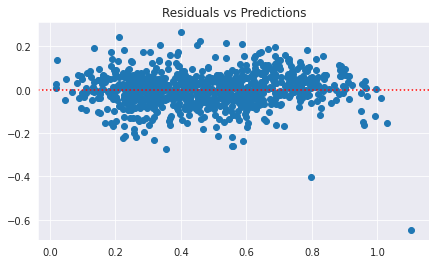

In [46]:
# residual analysis
residual_analysis(y_train, y_pred_train_ridge)

- The error terms are normally distributed.
- The Residuals vs Predictions plot does not show any trend in the data.

### Lasso Regression with GridSearch on α (regularization parameter)

In [47]:
# Applying cross-validation on hyper-parameter alpha
lasso_model = Lasso()
cv_folds = 10
gridsearch_lasso = GridSearchCV(estimator=lasso_model, param_grid=alpha_param_choices, scoring='neg_mean_absolute_error', cv=cv_folds, n_jobs=-1)
gridsearch_lasso.fit(X_train_rfe, y_train)
print(f"Best params for ridge: {gridsearch_lasso.best_params_}")

Best params for ridge: {'alpha': 0.0002}


In [48]:
# Building a Ridge Regression model with the alpha of 0.0002
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train_rfe, y_train)
y_pred_train_lasso = lasso.predict(X_train_rfe)
y_pred_test_lasso = lasso.predict(X_test_rfe)

In [49]:
print("Lasso Train Metrics: ")
print_metrics(y_train, y_pred_train_lasso)

Lasso Train Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,7.44416,0.840323,0.008083,0.089904


In [50]:
print("Lasso Test Metrics: ")
print_metrics(y_test, y_pred_test_lasso)

Lasso Test Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,3.657384,0.842812,0.009259,0.096225


From the previous linear regression model, this model has significantly improved on the test set with a R<sup>2</sup> value of 0.84 which is very similar to the train set score.

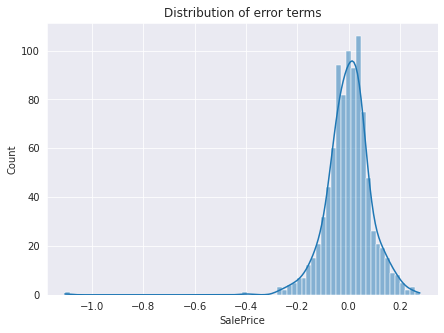

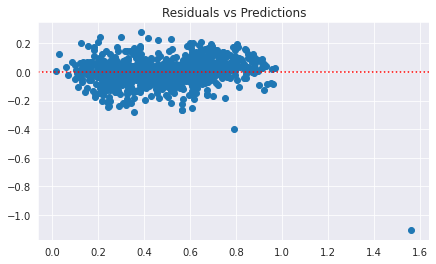

In [51]:
# residual analysis
residual_analysis(y_train, y_pred_train_lasso)

- The error terms are normally distributed.
- The Residuals vs Predictions plot does not show any trend in the data.

## Assignment Part 2 : Subjective Questions

In [52]:
# Doubling the value of alpha in ridge regression (0.1 * 2 = 0.2)
ridge_double_alpha = Ridge(alpha=0.2)
ridge_double_alpha.fit(X_train_rfe, y_train)
y_pred_train_ridge = ridge_double_alpha.predict(X_train_rfe)
y_pred_test_ridge = ridge_double_alpha.predict(X_test_rfe)

In [53]:
print("Ridge Train Metrics: ")
print_metrics(y_train, y_pred_train_ridge)

Ridge Train Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,6.163785,0.867787,0.006692,0.081808


In [54]:
print("Ridge Test Metrics: ")
print_metrics(y_test, y_pred_test_ridge)

Ridge Test Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,3.951345,0.830178,0.010003,0.100017


Train R<sup>2</sup> decreased from 0.88 to 0.86 and test R<sup>2</sup> increased to 0.83 from 0.80

In [55]:
# Doubling the value of alpha in ridge regression (0.0002 * 2 = 0.0004)
lasso_double_alpha = Lasso(alpha=0.0004)
lasso_double_alpha.fit(X_train_rfe, y_train)
y_pred_train_lasso = lasso_double_alpha.predict(X_train_rfe)
y_pred_test_lasso = lasso_double_alpha.predict(X_test_rfe)

In [56]:
print("Lasso Train Metrics: ")
print_metrics(y_train, y_pred_train_lasso)

Lasso Train Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,8.458646,0.818562,0.009184,0.095834


In [57]:
print("Lasso Test Metrics: ")
print_metrics(y_test, y_pred_test_lasso)

Lasso Test Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,3.875335,0.833445,0.009811,0.09905


Both train and test R<sup>2</sup> scores have decreased

### Getting top 5 predictors before and after alpha change

In [58]:
# Applying np.abs to get the absolute value of coefficients
model_coefs = {"Linear Model": np.abs(lm.coef_),
               "Ridge (alpha=0.1)": np.abs(ridge.coef_),
               "Ridge (alpha=0.2)": np.abs(ridge_double_alpha.coef_),
               "Lasso (alpha=0.0002)": np.abs(lasso.coef_),
               "Lasso (alpha=0.0004)": np.abs(lasso_double_alpha.coef_)}

model_coefs = pd.DataFrame(model_coefs, index=selected_cols)
model_coefs

,Linear Model,Ridge (alpha=0.1),Ridge (alpha=0.2),Lasso (alpha=0.0002),Lasso (alpha=0.0004)
LotFrontage,0.126566,0.016635,0.013565,0.000000e+00,0.000000
LotArea,0.553321,0.450186,0.400706,3.300494e-01,0.266483
OverallQual,0.291758,0.305229,0.309699,3.402399e-01,0.364254
OverallCond,0.171278,0.157529,0.151867,1.454720e-01,0.132425
BsmtFinSF1,0.414889,0.259769,0.211535,1.165990e-01,0.084150
BsmtFinSF2,0.056121,0.057836,0.058268,3.959773e-02,0.031803
BsmtUnfSF,0.042956,0.024047,0.018784,0.000000e+00,0.000000
TotalBsmtSF,0.407889,0.258595,0.212360,1.349423e-01,0.034413
1stFlrSF,0.398345,0.372450,0.360316,1.686454e-02,0.048195
2ndFlrSF,0.190210,0.158864,0.150772,0.000000e+00,0.000000


In [59]:
# top 5 features of the original Linear regression model
model_coefs[["Linear Model"]].sort_values("Linear Model", ascending=False).head()

,Linear Model
RoofMatl_Membran,2.478150
RoofMatl_Tar&Grv,2.259028
RoofMatl_WdShngl,2.220023
RoofMatl_CompShg,2.199778
RoofMatl_Roll,2.167553


In [60]:
# top 5 features of the original ridge regression model
model_coefs[["Ridge (alpha=0.1)"]].sort_values("Ridge (alpha=0.1)", ascending=False).head()

,Ridge (alpha=0.1)
RoofMatl_Membran,1.157388
RoofMatl_Tar&Grv,1.130512
RoofMatl_WdShngl,1.097669
RoofMatl_CompShg,1.078656
RoofMatl_WdShake,1.034230


In [61]:
# top 5 features of the original lasso regression model
model_coefs[["Lasso (alpha=0.0002)"]].sort_values("Lasso (alpha=0.0002)", ascending=False).head()

,Lasso (alpha=0.0002)
Condition2_PosN,0.764465
GrLivArea,0.751140
OverallQual,0.340240
LotArea,0.330049
RoofMatl_Tar&Grv,0.310086


In [62]:
# top 5 features for ridge regression after alpha change
model_coefs[["Ridge (alpha=0.2)"]].sort_values("Ridge (alpha=0.2)", ascending=False).head()

,Ridge (alpha=0.2)
Condition2_PosN,0.879829
RoofMatl_Tar&Grv,0.768722
RoofMatl_WdShngl,0.738253
RoofMatl_Membran,0.735579
RoofMatl_CompShg,0.717727


In [63]:
# top 5 features for lasso regression after alpha change
model_coefs[["Lasso (alpha=0.0004)"]].sort_values("Lasso (alpha=0.0004)", ascending=False).head()

,Lasso (alpha=0.0004)
GrLivArea,0.678989
Condition2_PosN,0.482891
OverallQual,0.364254
LotArea,0.266483
GarageCars,0.225172


In [64]:
# Building a new lasso model after removing the top 5 features
cols_to_remove = ['Condition2_PosN', 'GrLivArea', 'OverallQual', 'LotArea', 'RoofMatl_Tar&Grv']
X_train_rfe_new = X_train_rfe.drop(cols_to_remove, axis=1)
X_test_rfe_new = X_test_rfe.drop(cols_to_remove, axis=1)

new_lasso = Lasso(alpha=0.0002)
new_lasso.fit(X_train_rfe_new, y_train)
y_pred_train_new = new_lasso.predict(X_train_rfe_new)
y_pred_test_new = new_lasso.predict(X_test_rfe_new)

In [65]:
print("Lasso Train Metrics: ")
print_metrics(y_train, y_pred_train_new)

Lasso Train Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,9.813501,0.7895,0.010655,0.103224


In [66]:
print("Lasso Test Metrics: ")
print_metrics(y_test, y_pred_test_new)

Lasso Test Metrics: 


,RSS,R2 Score,MSE,RMSE
metrics,4.38329,0.811614,0.011097,0.105342


In [67]:
new_lasso_coefs = {"New Lasso": np.abs(new_lasso.coef_)}

pd.DataFrame(new_lasso_coefs, index=X_test_rfe_new.columns).sort_values("New Lasso", ascending=False).head()

,New Lasso
1stFlrSF,0.705217
2ndFlrSF,0.297066
GarageCars,0.291193
house_age,0.288948
TotalBsmtSF,0.259122
